In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import sncosmo
import tdaspop
import snpop

In [4]:
from snpop import SimpleSALTPopulation, GMM_SALTPopulation

In [5]:
from collections import OrderedDict

In [6]:
print(sncosmo.__version__)
print(tdaspop.__version__)
print(snpop.__version__)
print(snpop.__file__)

2.0.1
0.1.6dev1
0.1.6dev3
/Users/rbiswas/soft/mypython3/lib/python3.7/site-packages/snpop-0.1.6.dev3-py3.7.egg/snpop/__init__.py


# GMM SALT Distributions

The SALT model used for SNIa has the following parameters for each SNIa :
```x0, x1, c, z, t0 ```. `t0` is the time of the peak in B band, and this is expected to be uniformly distributed in time. The remaining parameters are from a population distribution, which was trained on the SNLS data by David Rubin. The result is parametrized in terms of a distribution of ```x1, c, mBB``` where `mBB` is an auxillary parameter, related to `mB` the `BessellB` band peak magnitude by a `H0=70` cosmology distance. The model here adds an intrinsic dispersion in the luminosity.

As, with `SimpleSALTPopulation`, there are two ways to use `GMM_SALTPopulation`:
1. Use it with a supplied sample of SN redshifts.
2. Supply it with the area of the sky, the duration of the survey, and the redshift bounds, and it will use a powerlaw rate for SN to obtain a redshift sample, and run through with the previous case. 

To start with we describe the first case

### `GMM_SALTPopulation`

obtain a set of samples for the redshift

In [7]:
zSamples = np.random.uniform(0, 1.0, size=10)
print(zSamples)

[0.53417863 0.21723113 0.06622579 0.58722058 0.7421798  0.95455505
 0.0856527  0.29412917 0.08914384 0.89084207]


Instantiate the object

In [8]:
gp = GMM_SALTPopulation(zSamples, rng=np.random.RandomState(1))

In [9]:
gp.idxvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
all(gp.zSamples == zSamples)

True

In [11]:
gp.cosmo

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

In [12]:
gp.paramsTable

,x0,mB,x1,c,mBB,MnoDisp,Mabs,t0,z,model
idx,,,,,,,,,,
0,0.000005,23.795051,-1.407174,0.005453,23.533329,-18.964603,-18.702881,61102.130317,0.534179,SALT2
1,0.000065,20.974513,0.795911,0.019769,21.088694,-19.136781,-19.250962,62209.184401,0.217231,SALT2
2,0.001123,17.874416,0.928076,-0.123194,17.826560,-19.613694,-19.565838,59580.417468,0.066226,SALT2
3,0.000008,23.240998,-0.461267,-0.110833,23.278403,-19.467396,-19.504801,60683.513890,0.587221,SALT2
4,0.000002,24.516101,0.100458,0.037719,24.296785,-19.067642,-18.848326,60115.659001,0.742180,SALT2
5,0.000002,24.547334,0.415928,-0.009678,24.856355,-19.179117,-19.488138,59917.035871,0.954555,SALT2
6,0.000481,18.796376,0.977850,0.039244,18.844738,-19.183077,-19.231440,60259.849772,0.085653,SALT2
7,0.000047,21.327213,1.472832,-0.065890,21.384821,-19.588261,-19.645869,60841.296654,0.294129,SALT2
8,0.000527,18.695127,1.710394,-0.057720,18.525062,-19.594630,-19.424564,61028.201281,0.089144,SALT2


In [13]:
gp.modelParams(3)

OrderedDict([('x0', 8.02262739752989e-06),
             ('mB', 23.240997888634087),
             ('x1', -0.4612667739312083),
             ('c', -0.1108331070848183),
             ('mBB', 23.2784034449557),
             ('MnoDisp', -19.46739577794571),
             ('Mabs', -19.504801334267324),
             ('t0', 60683.51389010622),
             ('z', 0.5872205770976436),
             ('model', 'SALT2')])

### 2. Generate From the skyArea, redshift bounds and survey Duration

This uses the `fromSkyArea` method

In general, we will not have a redshift distribution or a redshift sample to use. In this case, we prefer to use 
the `fromSkyArea` method which instead obtains these samples from using the fieldArea, zmin and zmax. Right now, we also need `numzBins` because of the binned implementation which we will later get rid of.

In [14]:
gpz = GMM_SALTPopulation.fromSkyArea(rng=np.random.RandomState(1), fieldArea=0.5)

In [15]:
gpz.zSamples.size

1351

In [16]:
gpz.numSources

1351

In [17]:
gpz.paramsTable.head()

,x0,mB,x1,c,mBB,MnoDisp,Mabs,t0,z,model
idx,,,,,,,,,,
0,0.000187,19.824381,0.119824,-0.023060,19.712730,-19.265421,-19.153770,62394.169557,0.128958,SALT2
1,0.000071,20.872119,1.286653,-0.063560,20.703653,-19.555282,-19.386816,60783.533039,0.220232,SALT2
2,0.000039,21.521249,0.212062,0.167097,21.386896,-18.667824,-18.533470,62487.438845,0.202496,SALT2
3,0.000126,20.253594,0.588571,-0.005698,20.415397,-19.190099,-19.351902,60764.929876,0.168033,SALT2
4,0.000037,21.593357,-0.015669,-0.042340,21.534681,-19.308702,-19.250025,60703.770920,0.279210,SALT2


## Characterizations of the Distribution

## Form of the internal dispersion

In [18]:
import scipy

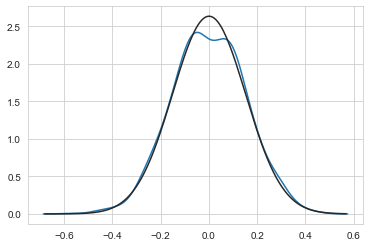

In [19]:
fig, ax = plt.subplots()
sns.distplot(gpz.paramsTable.Mabs - gpz.paramsTable.MnoDisp, hist=False, fit=scipy.stats.norm)

## Checks on the Hubble Diagram

In [20]:
from astropy.cosmology import Planck15

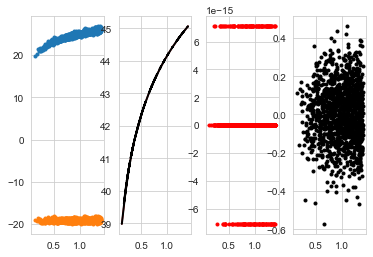

In [21]:
fig, ax = plt.subplots(1, 4)
ax[0].plot(gpz.paramsTable.z, gpz.paramsTable.mB, '.')
ax[0].plot(gpz.paramsTable.z, gpz.paramsTable.Mabs, '.')
ax[1].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.Mabs, color='r')
ax[1].plot(gpz.paramsTable.z, Planck15.distmod(gpz.paramsTable.z).value, color='k', lw=2)
ax[2].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.Mabs - Planck15.distmod(gpz.paramsTable.z).value, 'r.')
ax[3].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.MnoDisp - Planck15.distmod(gpz.paramsTable.z).value, 'k.')

## Distribution of x1 and c

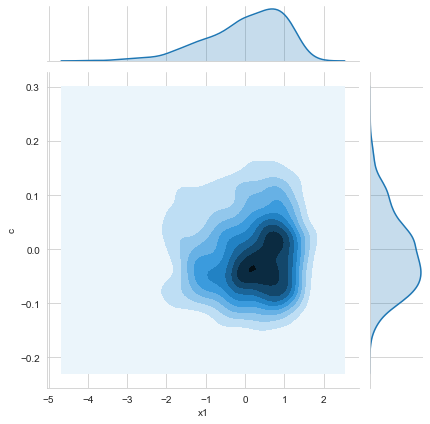

In [22]:
#fig = plt.figure(figsize=(6,6))
jp = sns.jointplot(data=gpz.paramsTable, x='x1', y='c', kind='kde')
jp.fig.set_figheight(6)
jp.fig.set_figwidth(6)

In [23]:
gpz.paramsTable.c.std()

0.07169495370742768

In [24]:
gpz.paramsTable.x1.std()

0.9466470033355492